In [1]:
import pandas as pd

df = pd.read_csv('personality_dataset.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [2]:
print(df.isnull().sum())

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [3]:
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
cat_cols = ['Stage_fear', 'Drained_after_socializing']

for col in num_cols:
     df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
     df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/bg/dz81gbrn53g1mwtn_n2x_k8c0000gn/T/ipykernel_31561/2485123592.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/bg/dz81gbrn53g1mwtn_n2x_k8c0000gn/T/ipykernel_31561/2485123592.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [4]:
print(df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
print(df.dtypes)

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object


In [7]:
df['Stage_fear'] = df['Stage_fear'].str.strip().str.capitalize()
df['Drained_after_socializing'] = df['Drained_after_socializing'].str.strip().str.capitalize()

In [8]:
print(df[num_cols].describe())

       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2452.000000              2452.000000    2452.000000   
mean           4.188825                 4.200245       3.221044   
std            3.410425                 2.889554       2.214543   
min            0.000000                 0.000000       0.000000   
25%            1.000000                 2.000000       1.000000   
50%            3.000000                 4.000000       3.000000   
75%            7.000000                 7.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2452.000000     2452.000000  
mean              6.589723        3.836868  
std               4.281852        2.917801  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               6.000000        3.000000  
75%              10.000000        6.000000  
max              15.000000       10.

In [9]:
for col in cat_cols + ['Personality']:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())


Value counts for Stage_fear:
Stage_fear
No     1399
Yes    1053
Name: count, dtype: int64

Value counts for Drained_after_socializing:
Drained_after_socializing
No     1401
Yes    1051
Name: count, dtype: int64

Value counts for Personality:
Personality
Extrovert    1395
Introvert    1057
Name: count, dtype: int64


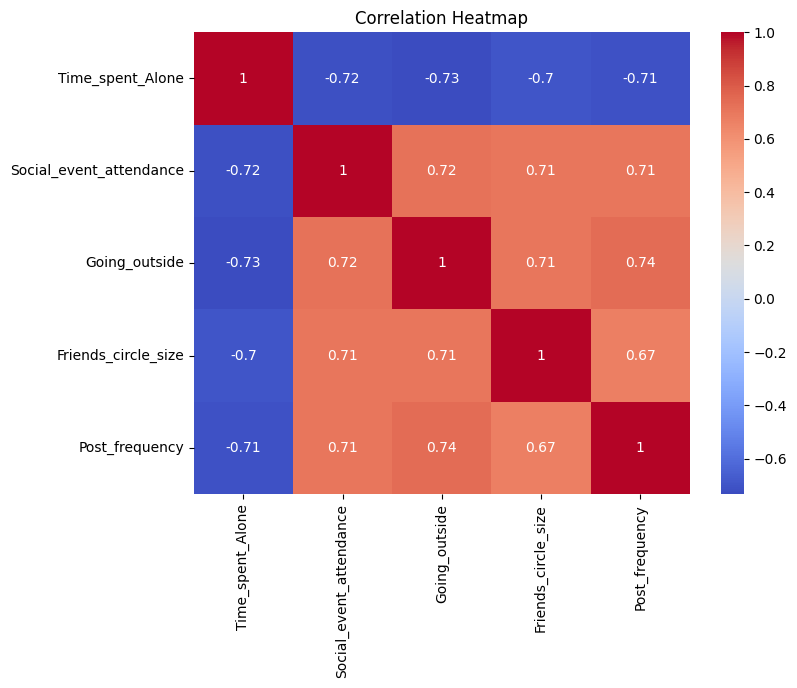

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


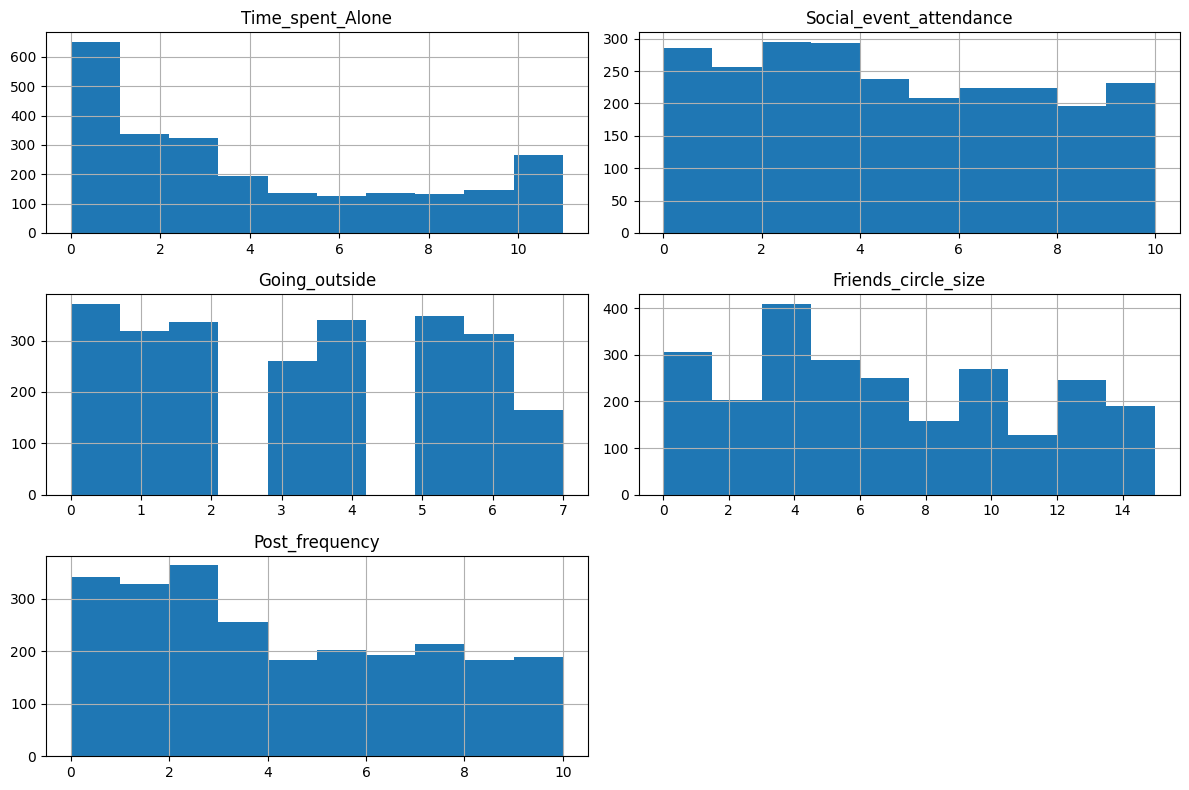

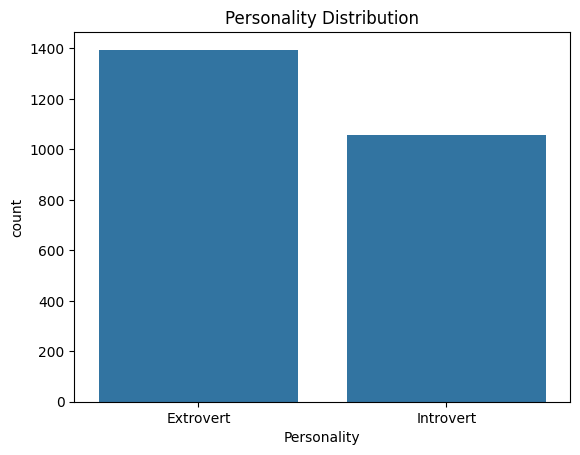

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
df[num_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Count plot for Personality
sns.countplot(x='Personality', data=df)
plt.title('Personality Distribution')
plt.show()

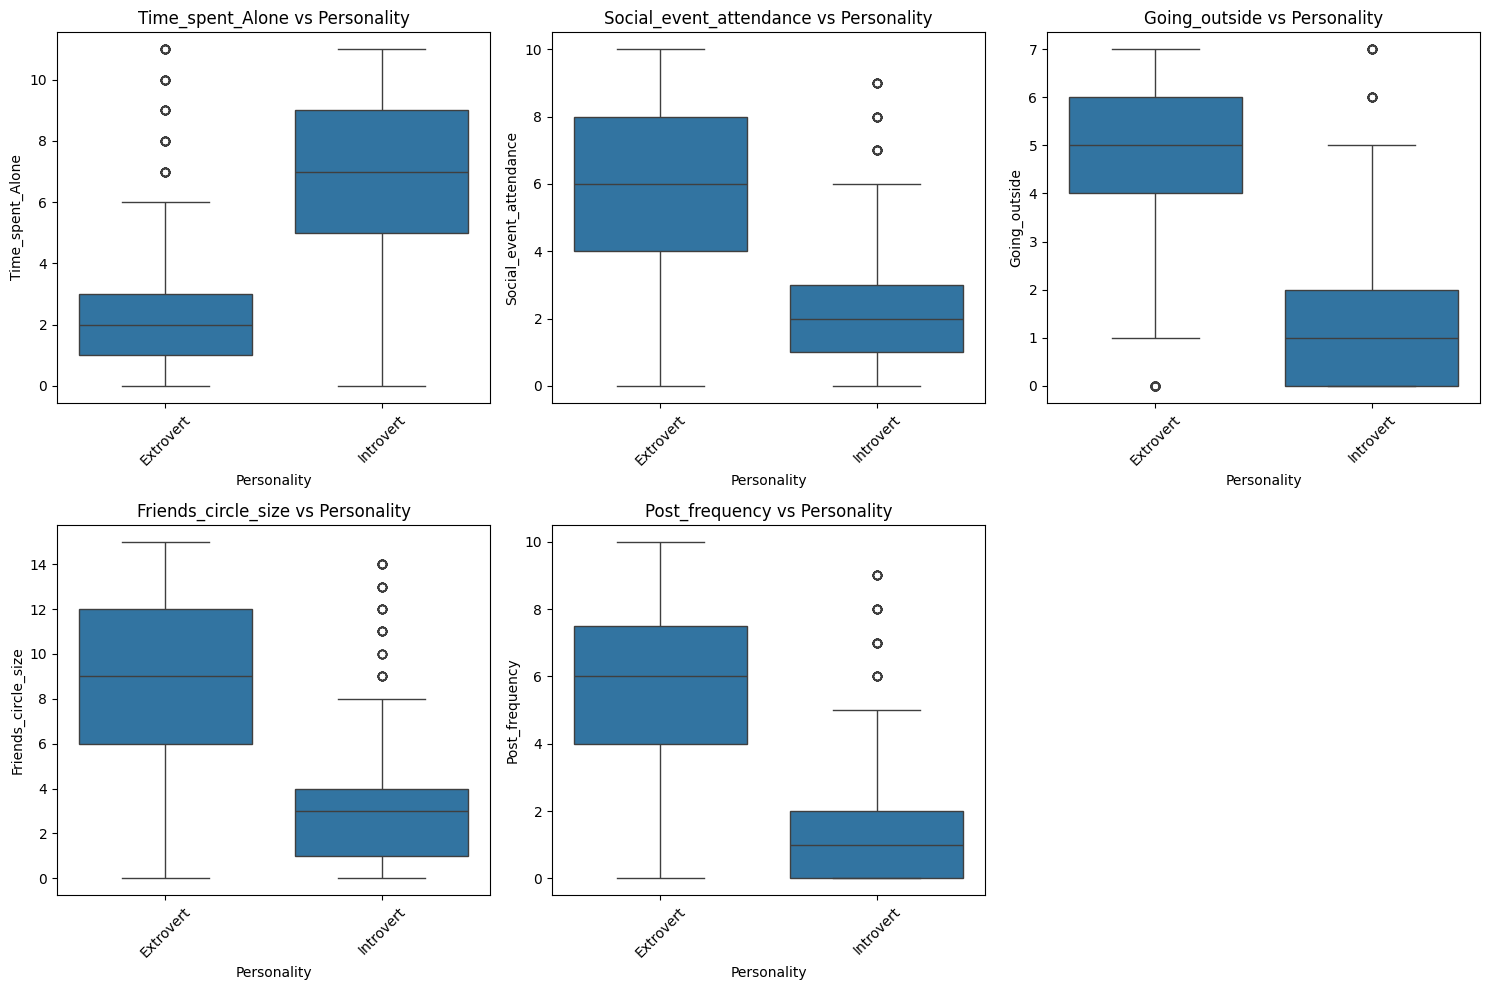

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Personality', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Personality')
plt.tight_layout()
plt.show()

In [13]:
print("\nMean values for each personality type:")
print(df.groupby('Personality')[num_cols].mean())



Mean values for each personality type:
             Time_spent_Alone  Social_event_attendance  Going_outside  \
Personality                                                             
Extrovert            2.117563                 5.951254       4.587814   
Introvert            6.922422                 1.889309       1.417219   

             Friends_circle_size  Post_frequency  
Personality                                       
Extrovert               9.049462        5.589964  
Introvert               3.343425        1.523179  


In [14]:
from scipy.stats import chi2_contingency

print("\nChi-square test results for categorical variables:")
for cat in cat_cols:
    contingency = pd.crosstab(df['Personality'], df[cat])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    print(f"\n{cat}:")
    print(f"Chi-square value: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")


Chi-square test results for categorical variables:

Stage_fear:
Chi-square value: 1653.39
p-value: 0.0000

Drained_after_socializing:
Chi-square value: 1646.55
p-value: 0.0000


Epoch 1/30


/Users/nnd/.pyenv/versions/3.9.19/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9274 - loss: 1.3184 - val_accuracy: 0.9186 - val_loss: 1.1134
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9283 - loss: 1.0673 - val_accuracy: 0.9186 - val_loss: 0.9072
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9174 - loss: 0.8831 - val_accuracy: 0.9186 - val_loss: 0.7591
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9213 - loss: 0.7494 - val_accuracy: 0.9186 - val_loss: 0.6512
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9238 - loss: 0.6495 - val_accuracy: 0.9186 - val_loss: 0.5727
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9226 - loss: 0.5723 - val_accuracy: 0.9186 - val_loss: 0.5170
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9247 - loss: 0.4984 - val_accuracy: 0.9186 - val_loss: 0.4761
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9260 - loss: 0.4595 - val_accuracy: 0.9186 - val_loss: 0.

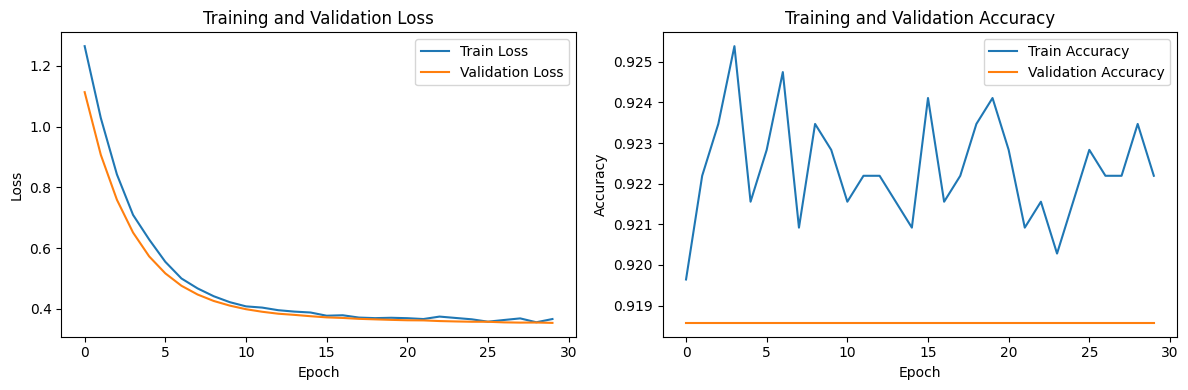

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Model Evaluation:
----------------
Accuracy: 0.9308

Detailed Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.94      0.94      0.94       279
   Introvert       0.92      0.92      0.92       212

    accuracy                           0.93       491
   macro avg       0.93      0.93      0.93       491
weighted avg       0.93      0.93      0.93       491



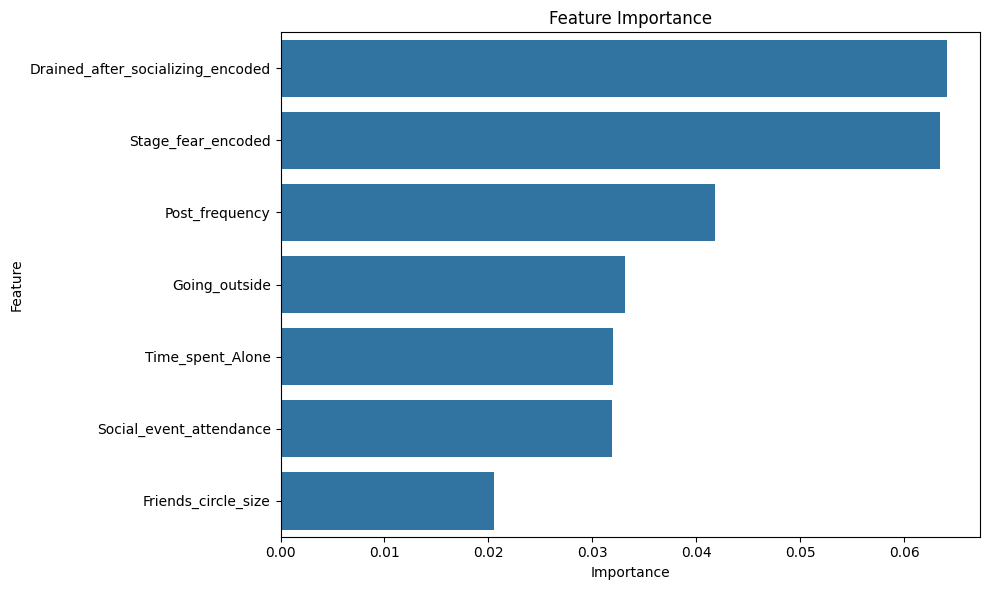

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.activations import swish
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Prepare features and target
# Encode categorical variables
le_stage = LabelEncoder()
le_drained = LabelEncoder()
le_personality = LabelEncoder()

df['Stage_fear_encoded'] = le_stage.fit_transform(df['Stage_fear'])
df['Drained_after_socializing_encoded'] = le_drained.fit_transform(df['Drained_after_socializing'])
y = le_personality.fit_transform(df['Personality'])

# Select and prepare features
selected_features = num_cols + ['Stage_fear_encoded', 'Drained_after_socializing_encoded']
X = df[selected_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Build the model
model = Sequential([
    Dense(16, activation=swish, input_shape=(len(selected_features),), 
          kernel_regularizer=l2(0.1)),
    Dropout(0.3),
    Dense(8, activation=swish, kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(len(le_personality.classes_), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, 
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print("\nModel Evaluation:")
print("----------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_classes, 
                          target_names=le_personality.classes_))

# Feature importance analysis
feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Epoch 1/100


/Users/nnd/.pyenv/versions/3.9.19/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6945 - loss: 1.6536
Epoch 1: val_loss improved from inf to 1.35158, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6953 - loss: 1.6519 - val_accuracy: 0.9160 - val_loss: 1.3516
Epoch 2/100
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8306 - loss: 1.3552
Epoch 2: val_loss improved from 1.35158 to 1.10600, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8321 - loss: 1.3456 - val_accuracy: 0.9160 - val_loss: 1.1060
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8798 - loss: 1.1144
Epoch 3: val_loss improved from 1.10600 to 0.92382, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8799 - loss: 1.1135 - val_accuracy: 0.9186 - val_loss: 0.9238
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8899 - loss: 0.9460
Epoch 4: val_loss improved from 0.92382 to 0.78265, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8899 - loss: 0.9451 - val_accuracy: 0.9186 - val_loss: 0.7826
Epoch 5/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8941 - loss: 0.8213
Epoch 5: val_loss improved from 0.78265 to 0.67553, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8950 - loss: 0.8182 - val_accuracy: 0.9186 - val_loss: 0.6755
Epoch 6/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9016 - loss: 0.6970
Epoch 6: val_loss improved from 0.67553 to 0.59934, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9017 - loss: 0.6965 - val_accuracy: 0.9186 - val_loss: 0.5993
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9089 - loss: 0.6491
Epoch 7: val_loss improved from 0.59934 to 0.54097, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9089 - loss: 0.6486 - val_accuracy: 0.9186 - val_loss: 0.5410
Epoch 8/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9050 - loss: 0.6014
Epoch 8: val_loss improved from 0.54097 to 0.49663, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9053 - loss: 0.5992 - val_accuracy: 0.9186 - val_loss: 0.4966
Epoch 9/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9293 - loss: 0.5199
Epoch 9: val_loss improved from 0.49663 to 0.46461, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9287 - loss: 0.5206 - val_accuracy: 0.9186 - val_loss: 0.4646
Epoch 10/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9244 - loss: 0.5074
Epoch 10: val_loss improved from 0.46461 to 0.44063, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9242 - loss: 0.5073 - val_accuracy: 0.9186 - val_loss: 0.4406
Epoch 11/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9250 - loss: 0.4774
Epoch 11: val_loss improved from 0.44063 to 0.42346, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9247 - loss: 0.4775 - val_accuracy: 0.9186 - val_loss: 0.4235
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9179 - loss: 0.4651
Epoch 12: val_loss improved from 0.42346 to 0.41086, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9179 - loss: 0.4651 - val_accuracy: 0.9186 - val_loss: 0.4109
Epoch 13/100
43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9221 - loss: 0.4350
Epoch 13: val_loss improved from 0.41086 to 0.40086, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9210 - loss: 0.4361 - val_accuracy: 0.9186 - val_loss: 0.4009
Epoch 14/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9116 - loss: 0.4429
Epoch 14: val_loss improved from 0.40086 to 0.39382, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9118 - loss: 0.4426 - val_accuracy: 0.9186 - val_loss: 0.3938
Epoch 15/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9096 - loss: 0.4563
Epoch 15: val_loss improved from 0.39382 to 0.39061, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9098 - loss: 0.4560 - val_accuracy: 0.9186 - val_loss: 0.3906
Epoch 16/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9222 - loss: 0.4214
Epoch 16: val_loss improved from 0.39061 to 0.38502, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9218 - loss: 0.4215 - val_accuracy: 0.9186 - val_loss: 0.3850
Epoch 17/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9182 - loss: 0.4198
Epoch 17: val_loss improved from 0.38502 to 0.38116, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9183 - loss: 0.4196 - val_accuracy: 0.9186 - val_loss: 0.3812
Epoch 18/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9128 - loss: 0.4454
Epoch 18: val_loss improved from 0.38116 to 0.37918, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9130 - loss: 0.4451 - val_accuracy: 0.9186 - val_loss: 0.3792
Epoch 19/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9289 - loss: 0.4002
Epoch 19: val_loss improved from 0.37918 to 0.37628, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9285 - loss: 0.4016 - val_accuracy: 0.9186 - val_loss: 0.3763
Epoch 20/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9235 - loss: 0.4026
Epoch 20: val_loss improved from 0.37628 to 0.37360, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9233 - loss: 0.4035 - val_accuracy: 0.9186 - val_loss: 0.3736
Epoch 21/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9120 - loss: 0.4244
Epoch 21: val_loss improved from 0.37360 to 0.37218, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9122 - loss: 0.4240 - val_accuracy: 0.9186 - val_loss: 0.3722
Epoch 22/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9276 - loss: 0.3919
Epoch 22: val_loss improved from 0.37218 to 0.37082, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9275 - loss: 0.3919 - val_accuracy: 0.9186 - val_loss: 0.3708
Epoch 23/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9248 - loss: 0.3838
Epoch 23: val_loss improved from 0.37082 to 0.36855, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9247 - loss: 0.3841 - val_accuracy: 0.9186 - val_loss: 0.3685
Epoch 24/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9169 - loss: 0.4146
Epoch 24: val_loss improved from 0.36855 to 0.36721, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9169 - loss: 0.4145 - val_accuracy: 0.9186 - val_loss: 0.3672
Epoch 25/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9235 - loss: 0.4041
Epoch 25: val_loss improved from 0.36721 to 0.36583, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9233 - loss: 0.4039 - val_accuracy: 0.9186 - val_loss: 0.3658
Epoch 26/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9173 - loss: 0.4034
Epoch 26: val_loss improved from 0.36583 to 0.36521, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9173 - loss: 0.4035 - val_accuracy: 0.9186 - val_loss: 0.3652
Epoch 27/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9245 - loss: 0.3953
Epoch 27: val_loss improved from 0.36521 to 0.36374, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9245 - loss: 0.3960 - val_accuracy: 0.9186 - val_loss: 0.3637
Epoch 28/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9219 - loss: 0.3964
Epoch 28: val_loss improved from 0.36374 to 0.36267, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9219 - loss: 0.3968 - val_accuracy: 0.9186 - val_loss: 0.3627
Epoch 29/100
43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9240 - loss: 0.4089
Epoch 29: val_loss did not improve from 0.36267
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9235 - loss: 0.4090 - val_accuracy: 0.9186 - val_loss: 0.3631
Epoch 30/100
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9108 - loss: 0.4207
Epoch 30: val_loss improved from 0.36267 to 0.36061, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9117 - loss: 0.4182 - val_accuracy: 0.9186 - val_loss: 0.3606
Epoch 31/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9179 - loss: 0.4091
Epoch 31: val_loss improved from 0.36061 to 0.35968, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9180 - loss: 0.4089 - val_accuracy: 0.9186 - val_loss: 0.3597
Epoch 32/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9174 - loss: 0.3771
Epoch 32: val_loss improved from 0.35968 to 0.35911, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9175 - loss: 0.3772 - val_accuracy: 0.9186 - val_loss: 0.3591
Epoch 33/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9261 - loss: 0.3706
Epoch 33: val_loss improved from 0.35911 to 0.35831, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9259 - loss: 0.3709 - val_accuracy: 0.9186 - val_loss: 0.3583
Epoch 34/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9230 - loss: 0.3742
Epoch 34: val_loss improved from 0.35831 to 0.35778, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9229 - loss: 0.3744 - val_accuracy: 0.9186 - val_loss: 0.3578
Epoch 35/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9045 - loss: 0.4168
Epoch 35: val_loss improved from 0.35778 to 0.35738, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9048 - loss: 0.4164 - val_accuracy: 0.9186 - val_loss: 0.3574
Epoch 36/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9196 - loss: 0.3896
Epoch 36: val_loss improved from 0.35738 to 0.35647, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9196 - loss: 0.3896 - val_accuracy: 0.9186 - val_loss: 0.3565
Epoch 37/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9260 - loss: 0.3614
Epoch 37: val_loss improved from 0.35647 to 0.35573, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9258 - loss: 0.3624 - val_accuracy: 0.9186 - val_loss: 0.3557
Epoch 38/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9111 - loss: 0.4139
Epoch 38: val_loss improved from 0.35573 to 0.35508, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9117 - loss: 0.4125 - val_accuracy: 0.9186 - val_loss: 0.3551
Epoch 39/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9105 - loss: 0.4112
Epoch 39: val_loss improved from 0.35508 to 0.35466, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9110 - loss: 0.4104 - val_accuracy: 0.9186 - val_loss: 0.3547
Epoch 40/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9195 - loss: 0.3811
Epoch 40: val_loss improved from 0.35466 to 0.35394, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9195 - loss: 0.3813 - val_accuracy: 0.9186 - val_loss: 0.3539
Epoch 41/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9318 - loss: 0.3598
Epoch 41: val_loss did not improve from 0.35394
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9311 - loss: 0.3616 - val_accuracy: 0.9186 - val_loss: 0.3542
Epoch 42/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9151 - loss: 0.4052
Epoch 42: val_loss improved from 0.35394 to 0.35275, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9154 - loss: 0.4043 - val_accuracy: 0.9186 - val_loss: 0.3528
Epoch 43/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9205 - loss: 0.3801
Epoch 43: val_loss improved from 0.35275 to 0.35262, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9206 - loss: 0.3804 - val_accuracy: 0.9186 - val_loss: 0.3526
Epoch 44/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9098 - loss: 0.3986
Epoch 44: val_loss improved from 0.35262 to 0.35222, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9107 - loss: 0.3969 - val_accuracy: 0.9186 - val_loss: 0.3522
Epoch 45/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9134 - loss: 0.3931
Epoch 45: val_loss improved from 0.35222 to 0.35214, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9136 - loss: 0.3925 - val_accuracy: 0.9186 - val_loss: 0.3521
Epoch 46/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9121 - loss: 0.3906
Epoch 46: val_loss improved from 0.35214 to 0.35160, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9124 - loss: 0.3902 - val_accuracy: 0.9186 - val_loss: 0.3516
Epoch 47/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9174 - loss: 0.3861
Epoch 47: val_loss improved from 0.35160 to 0.35096, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9174 - loss: 0.3859 - val_accuracy: 0.9186 - val_loss: 0.3510
Epoch 48/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9195 - loss: 0.3884
Epoch 48: val_loss improved from 0.35096 to 0.35071, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9195 - loss: 0.3883 - val_accuracy: 0.9186 - val_loss: 0.3507
Epoch 49/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9115 - loss: 0.3827
Epoch 49: val_loss did not improve from 0.35071
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9118 - loss: 0.3820 - val_accuracy: 0.9186 - val_loss: 0.3517
Epoch 50/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9289 - loss: 0.3739
Epoch 50: val_loss improved from 0.35071 to 0.34998, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9284 - loss: 0.3753 - val_accuracy: 0.9186 - val_loss: 0.3500
Epoch 51/100
43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9167 - loss: 0.3825
Epoch 51: val_loss improved from 0.34998 to 0.34978, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9170 - loss: 0.3827 - val_accuracy: 0.9186 - val_loss: 0.3498
Epoch 52/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9234 - loss: 0.3943
Epoch 52: val_loss did not improve from 0.34978
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9233 - loss: 0.3941 - val_accuracy: 0.9186 - val_loss: 0.3503
Epoch 53/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9129 - loss: 0.3998
Epoch 53: val_loss improved from 0.34978 to 0.34843, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9131 - loss: 0.3992 - val_accuracy: 0.9186 - val_loss: 0.3484
Epoch 54/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9286 - loss: 0.3537
Epoch 54: val_loss improved from 0.34843 to 0.34804, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9281 - loss: 0.3551 - val_accuracy: 0.9186 - val_loss: 0.3480
Epoch 55/100
45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9146 - loss: 0.3864
Epoch 55: val_loss improved from 0.34804 to 0.34777, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9152 - loss: 0.3851 - val_accuracy: 0.9186 - val_loss: 0.3478
Epoch 56/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9198 - loss: 0.3686
Epoch 56: val_loss improved from 0.34777 to 0.34744, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9199 - loss: 0.3689 - val_accuracy: 0.9186 - val_loss: 0.3474
Epoch 57/100
45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9118 - loss: 0.3994
Epoch 57: val_loss did not improve from 0.34744
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9127 - loss: 0.3972 - val_accuracy: 0.9186 - val_loss: 0.3474
Epoch 58/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9276 - loss: 0.3533
Epoch 58: val_loss improved from 0.34744 to 0.34697, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9273 - loss: 0.3544 - val_accuracy: 0.9186 - val_loss: 0.3470
Epoch 59/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9220 - loss: 0.3749
Epoch 59: val_loss improved from 0.34697 to 0.34690, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9220 - loss: 0.3751 - val_accuracy: 0.9186 - val_loss: 0.3469
Epoch 60/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9192 - loss: 0.3831
Epoch 60: val_loss improved from 0.34690 to 0.34680, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9192 - loss: 0.3833 - val_accuracy: 0.9186 - val_loss: 0.3468
Epoch 61/100
45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9145 - loss: 0.3806
Epoch 61: val_loss improved from 0.34680 to 0.34666, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9150 - loss: 0.3802 - val_accuracy: 0.9186 - val_loss: 0.3467
Epoch 62/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9198 - loss: 0.3949
Epoch 62: val_loss did not improve from 0.34666
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9200 - loss: 0.3939 - val_accuracy: 0.9186 - val_loss: 0.3477
Epoch 63/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9312 - loss: 0.3644
Epoch 63: val_loss did not improve from 0.34666
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9308 - loss: 0.3653 - val_accuracy: 0.9186 - val_loss: 0.3469
Epoch 64/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9291 - loss: 0.3463
Epoch 64: val_loss improved from 0.34666 to 0.34641, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9284 - loss: 0.3487 - val_accuracy: 0.9186 - val_loss: 0.3464
Epoch 65/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9186 - loss: 0.4076
Epoch 65: val_loss improved from 0.34641 to 0.34586, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9188 - loss: 0.4069 - val_accuracy: 0.9186 - val_loss: 0.3459
Epoch 66/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9246 - loss: 0.3721
Epoch 66: val_loss improved from 0.34586 to 0.34510, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9245 - loss: 0.3727 - val_accuracy: 0.9186 - val_loss: 0.3451
Epoch 67/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9350 - loss: 0.3473 
Epoch 67: val_loss did not improve from 0.34510
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9343 - loss: 0.3492 - val_accuracy: 0.9186 - val_loss: 0.3473
Epoch 68/100
45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9272 - loss: 0.3601
Epoch 68: val_loss improved from 0.34510 to 0.34470, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9264 - loss: 0.3612 - val_accuracy: 0.9186 - val_loss: 0.3447
Epoch 69/100
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9067 - loss: 0.3946
Epoch 69: val_loss did not improve from 0.34470
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9085 - loss: 0.3901 - val_accuracy: 0.9186 - val_loss: 0.3463
Epoch 70/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9240 - loss: 0.3594
Epoch 70: val_loss improved from 0.34470 to 0.34368, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9239 - loss: 0.3596 - val_accuracy: 0.9186 - val_loss: 0.3437
Epoch 71/100
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9297 - loss: 0.3670
Epoch 71: val_loss did not improve from 0.34368
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9290 - loss: 0.3698 - val_accuracy: 0.9186 - val_loss: 0.3446
Epoch 72/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9212 - loss: 0.3667
Epoch 72: val_loss improved from 0.34368 to 0.34325, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9213 - loss: 0.3668 - val_accuracy: 0.9186 - val_loss: 0.3432
Epoch 73/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9182 - loss: 0.3674
Epoch 73: val_loss improved from 0.34325 to 0.34315, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9183 - loss: 0.3678 - val_accuracy: 0.9186 - val_loss: 0.3431
Epoch 74/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9259 - loss: 0.3581
Epoch 74: val_loss did not improve from 0.34315
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9258 - loss: 0.3586 - val_accuracy: 0.9186 - val_loss: 0.3432
Epoch 75/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9234 - loss: 0.3711
Epoch 75: val_loss improved from 0.34315 to 0.34257, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9234 - loss: 0.3711 - val_accuracy: 0.9186 - val_loss: 0.3426
Epoch 76/100
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9300 - loss: 0.3662
Epoch 76: val_loss improved from 0.34257 to 0.34253, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9290 - loss: 0.3675 - val_accuracy: 0.9186 - val_loss: 0.3425
Epoch 77/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9248 - loss: 0.3816
Epoch 77: val_loss improved from 0.34253 to 0.34230, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9246 - loss: 0.3812 - val_accuracy: 0.9186 - val_loss: 0.3423
Epoch 78/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9135 - loss: 0.4041
Epoch 78: val_loss improved from 0.34230 to 0.34129, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9141 - loss: 0.4027 - val_accuracy: 0.9186 - val_loss: 0.3413
Epoch 79/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9117 - loss: 0.4041
Epoch 79: val_loss did not improve from 0.34129
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9119 - loss: 0.4035 - val_accuracy: 0.9186 - val_loss: 0.3415
Epoch 80/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9190 - loss: 0.3880
Epoch 80: val_loss improved from 0.34129 to 0.34085, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9193 - loss: 0.3869 - val_accuracy: 0.9186 - val_loss: 0.3408
Epoch 81/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9274 - loss: 0.3711
Epoch 81: val_loss did not improve from 0.34085
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9270 - loss: 0.3704 - val_accuracy: 0.9186 - val_loss: 0.3409
Epoch 82/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9054 - loss: 0.4189
Epoch 82: val_loss improved from 0.34085 to 0.34058, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9057 - loss: 0.4182 - val_accuracy: 0.9186 - val_loss: 0.3406
Epoch 83/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9240 - loss: 0.3867
Epoch 83: val_loss did not improve from 0.34058
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9239 - loss: 0.3866 - val_accuracy: 0.9186 - val_loss: 0.3415
Epoch 84/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9156 - loss: 0.3775
Epoch 84: val_loss improved from 0.34058 to 0.34037, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9159 - loss: 0.3770 - val_accuracy: 0.9186 - val_loss: 0.3404
Epoch 85/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9122 - loss: 0.3769
Epoch 85: val_loss did not improve from 0.34037
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9131 - loss: 0.3756 - val_accuracy: 0.9186 - val_loss: 0.3405
Epoch 86/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9215 - loss: 0.3776
Epoch 86: val_loss improved from 0.34037 to 0.34030, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9215 - loss: 0.3776 - val_accuracy: 0.9186 - val_loss: 0.3403
Epoch 87/100
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9227 - loss: 0.3596
Epoch 87: val_loss improved from 0.34030 to 0.33979, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9228 - loss: 0.3609 - val_accuracy: 0.9186 - val_loss: 0.3398
Epoch 88/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9165 - loss: 0.3858
Epoch 88: val_loss improved from 0.33979 to 0.33945, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9167 - loss: 0.3851 - val_accuracy: 0.9186 - val_loss: 0.3395
Epoch 89/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9221 - loss: 0.3555
Epoch 89: val_loss did not improve from 0.33945
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9219 - loss: 0.3568 - val_accuracy: 0.9186 - val_loss: 0.3398
Epoch 90/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9241 - loss: 0.3589
Epoch 90: val_loss did not improve from 0.33945
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9241 - loss: 0.3589 - val_accuracy: 0.9186 - val_loss: 0.3398
Epoch 91/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9236 - loss: 0.3731
Epoch 91: val_loss improved from 0.33945 to 0.33893, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9234 - loss: 0.3731 - val_accuracy: 0.9186 - val_loss: 0.3389
Epoch 92/100
45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9195 - loss: 0.3769
Epoch 92: val_loss improved from 0.33893 to 0.33892, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9200 - loss: 0.3761 - val_accuracy: 0.9186 - val_loss: 0.3389
Epoch 93/100
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9079 - loss: 0.3991
Epoch 93: val_loss did not improve from 0.33892
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9098 - loss: 0.3961 - val_accuracy: 0.9186 - val_loss: 0.3391
Epoch 94/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9229 - loss: 0.3804
Epoch 94: val_loss improved from 0.33892 to 0.33884, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9230 - loss: 0.3801 - val_accuracy: 0.9186 - val_loss: 0.3388
Epoch 95/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9185 - loss: 0.3693
Epoch 95: val_loss improved from 0.33884 to 0.33860, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9188 - loss: 0.3690 - val_accuracy: 0.9186 - val_loss: 0.3386
Epoch 96/100
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9258 - loss: 0.3509
Epoch 96: val_loss did not improve from 0.33860
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9257 - loss: 0.3509 - val_accuracy: 0.9186 - val_loss: 0.3391
Epoch 97/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9269 - loss: 0.3586
Epoch 97: val_loss improved from 0.33860 to 0.33817, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9269 - loss: 0.3586 - val_accuracy: 0.9186 - val_loss: 0.3382
Epoch 98/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9144 - loss: 0.3894
Epoch 98: val_loss did not improve from 0.33817
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9145 - loss: 0.3890 - val_accuracy: 0.9186 - val_loss: 0.3387
Epoch 99/100
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9245 - loss: 0.3566
Epoch 99: val_loss improved from 0.33817 to 0.33813, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9246 - loss: 0.3572 - val_accuracy: 0.9186 - val_loss: 0.3381
Epoch 100/100
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9281 - loss: 0.3826
Epoch 100: val_loss improved from 0.33813 to 0.33793, saving model to best_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9278 - loss: 0.3819 - val_accuracy: 0.9186 - val_loss: 0.3379
Restoring model weights from the end of the best epoch: 100.


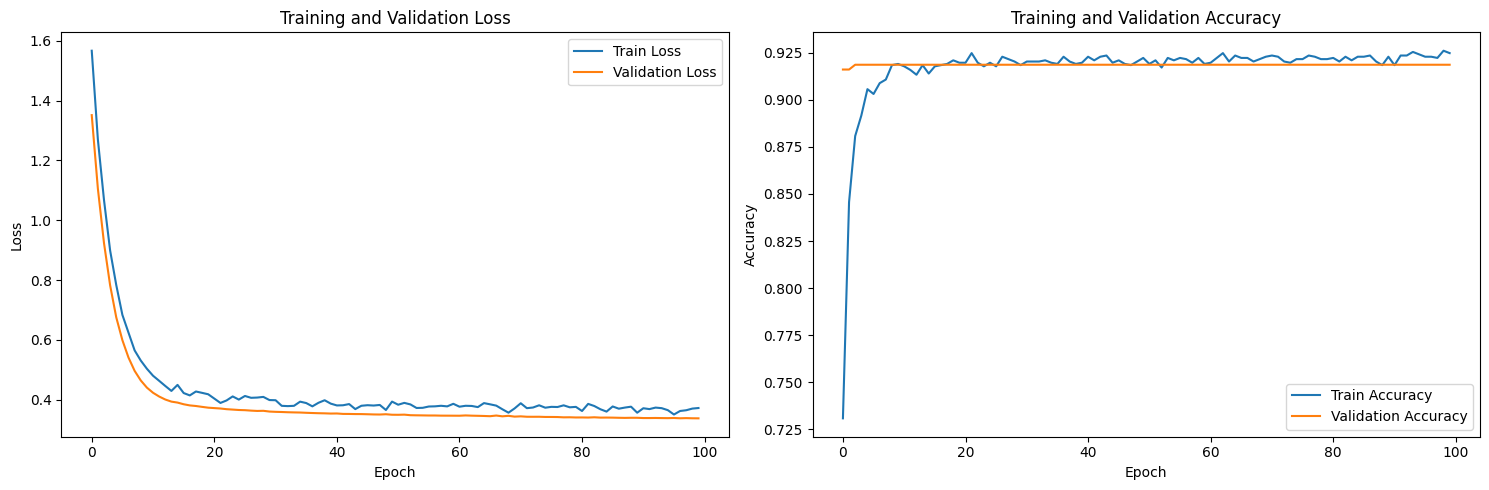

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Model Evaluation:
----------------
Accuracy: 0.9308

Detailed Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.94      0.94      0.94       279
   Introvert       0.92      0.92      0.92       212

    accuracy                           0.93       491
   macro avg       0.93      0.93      0.93       491
weighted avg       0.93      0.93      0.93       491



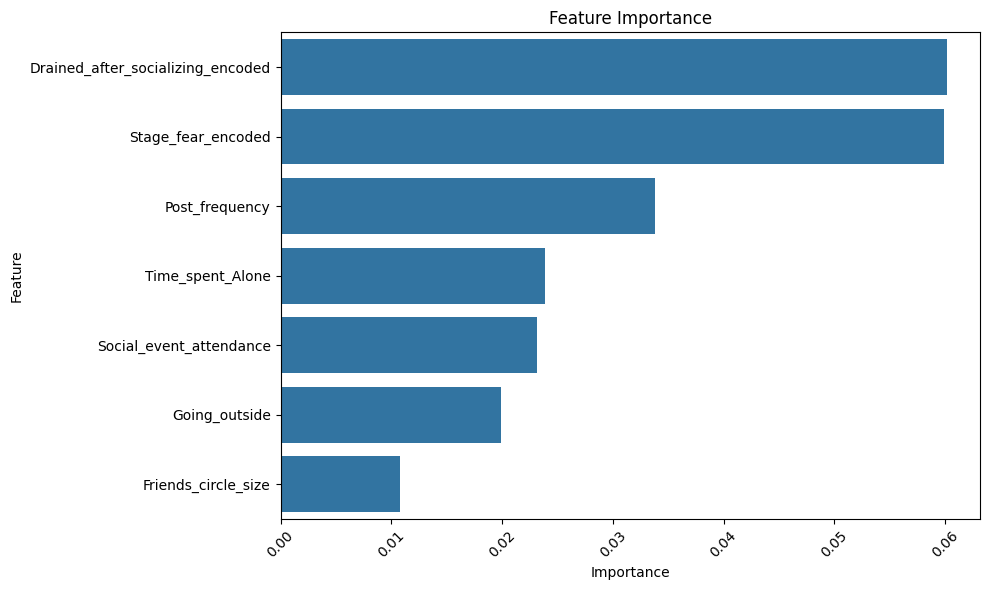

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



le_stage = LabelEncoder()
le_drained = LabelEncoder()
le_personality = LabelEncoder()

df['Stage_fear_encoded'] = le_stage.fit_transform(df['Stage_fear'])
df['Drained_after_socializing_encoded'] = le_drained.fit_transform(df['Drained_after_socializing'])
y = le_personality.fit_transform(df['Personality'])

selected_features = num_cols + ['Stage_fear_encoded', 'Drained_after_socializing_encoded']
X = df[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    mode='min',
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Build the model with manually tuned parameters
def create_model(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07):
    model = Sequential([
        Dense(16, activation='swish', input_shape=(len(selected_features),), 
              kernel_regularizer=l2(0.1)),
        Dropout(0.6),
        Dense(8, activation='swish', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(len(le_personality.classes_), activation='softmax')
    ])
    
    # Configure Adam optimizer with tunable parameters
    optimizer = Adam(
        learning_rate=learning_rate,
        beta_1=beta_1,
        beta_2=beta_2,
        epsilon=epsilon
    )
    
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

model = create_model(
    learning_rate=0.001,  
    beta_1=0.9,          
    beta_2=0.995,      
    epsilon=1e-07       
)

history = model.fit(
    X_train, 
    y_train,
    epochs=100,  
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

model = load_model('best_model.h5')

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Model evaluation
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print("\nModel Evaluation:")
print("----------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_classes, 
                          target_names=le_personality.classes_))

# Feature importance analysis
feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)